#### Watson Tone Analyzer

This python notebook analyzes political convention speeches:

* Use of Python SDK
* Use of REST API through HTTP requests

Although the Python SDK is constantly evolving, one can always revert to raw HTTP requests. This notebook can show how. 

##### Python SDK



In [1]:
!pip install --upgrade watson-developer-cloud

Requirement already up-to-date: watson-developer-cloud in /Users/sr876/anaconda/lib/python3.5/site-packages
Requirement already up-to-date: requests<3.0,>=2.0 in /Users/sr876/anaconda/lib/python3.5/site-packages (from watson-developer-cloud)
Requirement already up-to-date: pysolr<4.0,>=3.3 in /Users/sr876/anaconda/lib/python3.5/site-packages (from watson-developer-cloud)
You are using pip version 8.1.0, however version 8.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import json
import requests
from watson_developer_cloud import ToneAnalyzerV3
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

In [3]:
%matplotlib inline

Create a Tone Analyzer object, with the appropriate credentials. 

In [4]:
def analyze_tone(speech):
    uname='61c275a9-c04b-4086-9a0f-8dff92657a48'
    passwd='4rYjRHPXc4sf'
    tone_analyzer = ToneAnalyzerV3(
       username=uname,
       password=passwd,
       version='2016-09-21')
    result=tone_analyzer.tone(text=speech)
    return result

In [5]:
def analyze_personality(speech):
    uname='3a3d68ad-f82f-4370-9595-5abd7eed58b2'
    passwd='i5D2gccJnYZY'
    params={'version':'2016-09-30'}
    data={'contentItems': [{'content':speech}]}
    r=requests.post('https://gateway.watsonplatform.net/personality-insights/api/v2/profile',params=params,json=data,auth=(uname,passwd))
    return r

In [6]:
def plot_tones(tone,tone2,tone_category):
    width=0.25
    tones=tone['document_tone']['tone_categories'][tone_category]['tones']
    tones2=tone2['document_tone']['tone_categories'][tone_category]['tones']

    x=np.arange(len(tones))

    scores=[tones[i]['score'] for i in np.arange(len(tones))]
    scores2=[tones2[i]['score'] for i in np.arange(len(tones2))]
    tone_type=[tones[i]['tone_name'] for i in np.arange(len(tones))]

    fig,ax1=plt.subplots(figsize=(10,7))

    ax1.bar(x,scores,width,label='Hillary Clinton')
    ax1.bar(x+width,scores2,width,color=plt.rcParams['axes.color_cycle'][2],label='Donald Trump')
    ax1.set_xticks(x+width)
    ax1.set_xticklabels(tone_type)
    ax1.set_ylim(0,1)
    ax1.set_ylabel("Score")

    plt.legend(frameon=False)
    plt.show()

In [7]:
def sort_by_percentage(d):
    return d['percentage']

In [8]:
def plot_personality(personality,personality2,personality_category):
    width=0.25
    traits=personality["tree"]["children"][personality_category]["children"][0]['children']
    traits2=personality2["tree"]["children"][personality_category]["children"][0]['children']

    traits.sort(key=sort_by_percentage,reverse=True)
    traits2.sort(key=sort_by_percentage,reverse=True)

    length=len(traits)
    if length > 6:
        length=6
    #traits=[[i]['name'] for i in np.arange(length)
    #tones=tone['document_tone']['tone_categories'][tone_category]['tones']
    x=np.arange(length)
    
    scores=[traits[i]['percentage'] for i in np.arange(length)]
    scores2=[traits2[i]['percentage'] for i in np.arange(length)]
    trait_type=[traits[i]['name'] for i in np.arange(length)]
    #for i in np.arange(len(traits)):
     #   print trait_type
    fig,ax1=plt.subplots(figsize=(12,7))

    ax1.bar(x,scores,width,label='Hillary Clinton')
    ax1.bar(x+width,scores2,width,color=plt.rcParams['axes.color_cycle'][2],label='Donald Trump')

    ax1.set_xticks(x+width)
    ax1.set_xticklabels(trait_type)
    ax1.set_ylim(0,1)
    ax1.set_ylabel("Score")
    plt.legend(frameon=False)
    
    plt.show()

In [9]:
#hillaryfile=open('hillary3.txt','r')
hillaryfile=open('hillary_debate.txt','r')

hillaryspeech=hillaryfile.read()
trumpfile=open('trump_debate.txt','r')
trumpspeech=trumpfile.read()

In [10]:
hillary_tone=analyze_tone(hillaryspeech)
trump_tone=analyze_tone(trumpspeech)

#print(json.dumps(emily_tone,indent=2))


/Users/sr876/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


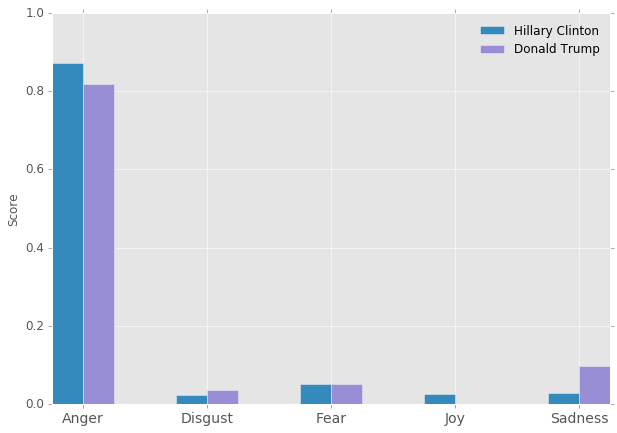

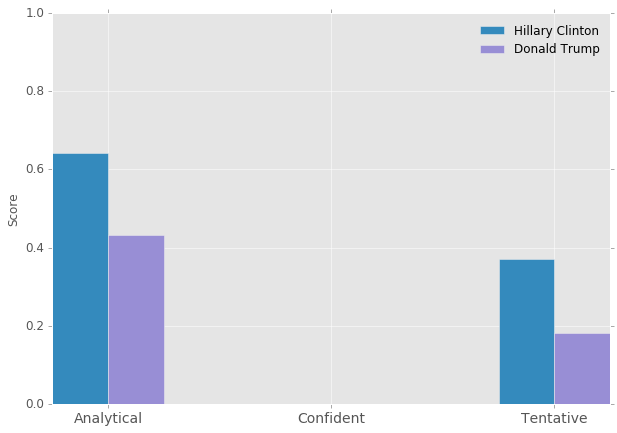

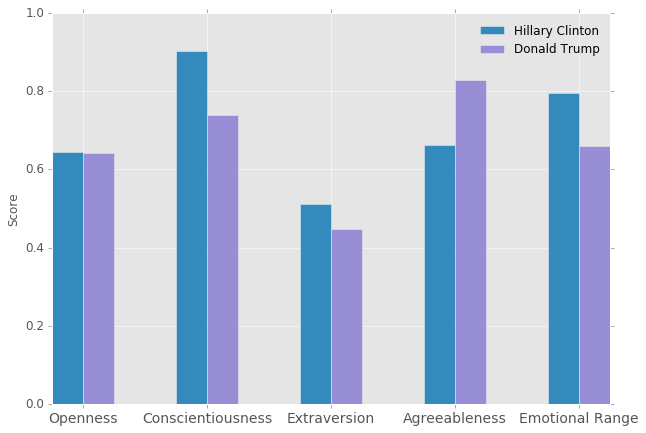

In [12]:
#print(emily_tone['document_tone']['tone_categories'][2])
plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=12
# first, emotional tone. Next language tone. Finally, social tone.
for i in np.arange(3):
    plot_tones(hillary_tone,trump_tone,i)


In [13]:
hillary_personality=analyze_personality(hillaryspeech)
trump_personality=analyze_personality(trumpspeech)
#print emily_personality


/Users/sr876/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


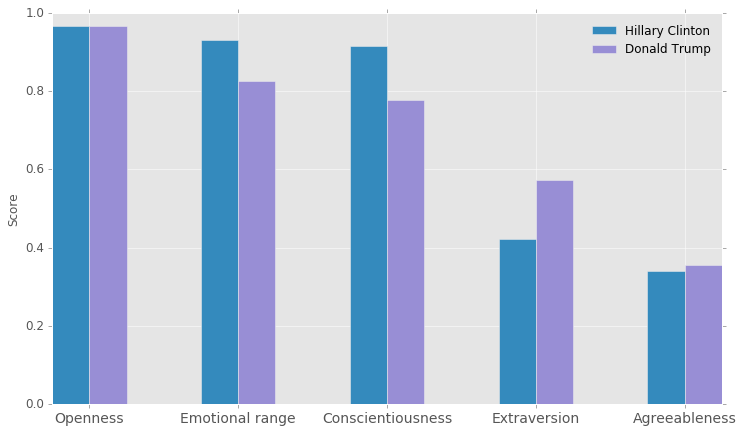

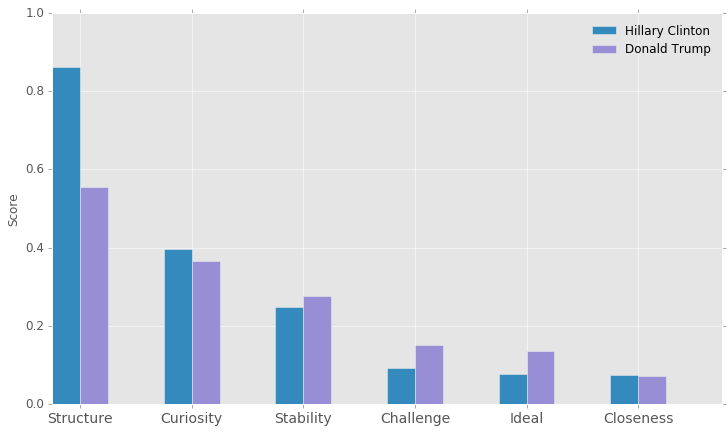

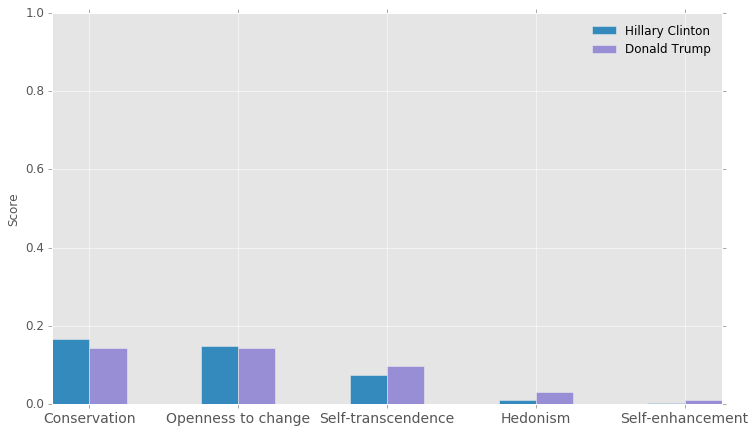

In [14]:
h_personality=json.loads(hillary_personality.text)
t_personality=json.loads(trump_personality.text)

# First, Personality. 2nd, Consumer Needs. Third, values.
for i in np.arange(3):
    plot_personality(h_personality,t_personality,i)
#print (personality["tree"]["children"][0]["children"][0]['children'][1]['name'])
#print json.dumps(personality["tree"]["children"],indent=2,sort_keys=True)